In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
#download dataset
data_path = '/Users/ceciliatorres/Desktop/Personal work/maintenance_risk/maintenance_risk/data/data.csv'
df = pd.read_csv(data_path)

#look at the shape of the dataset
print("Dataset shape:", df.shape)

#look at the first rows
df.head()

#summary of data types and non-null counts
df.info()

#basic statistics for numerical features
df.describe()


Dataset shape: (944, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


Preview the first rows to get a sense of the data format, feature types, and potential cleaning needs.

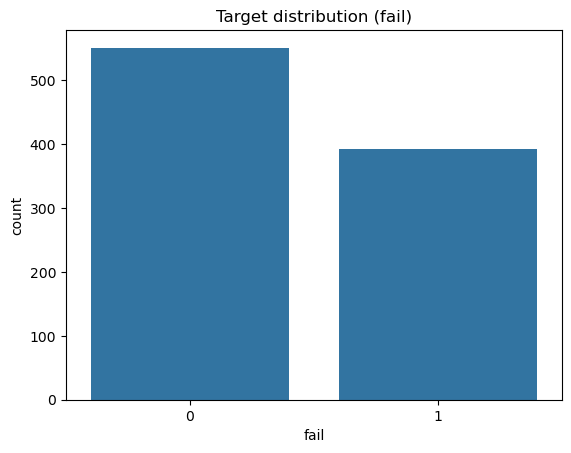

In [4]:
sns.countplot(x='fail', data=df)
plt.title("Target distribution (fail)")
plt.show()

There are a little more machines that did not fail (=0) than failed (=1)

Now let's look at the features distribution : we want to check if some variables are skewed, understand the scales, and see if we wuold need to do data transformation 

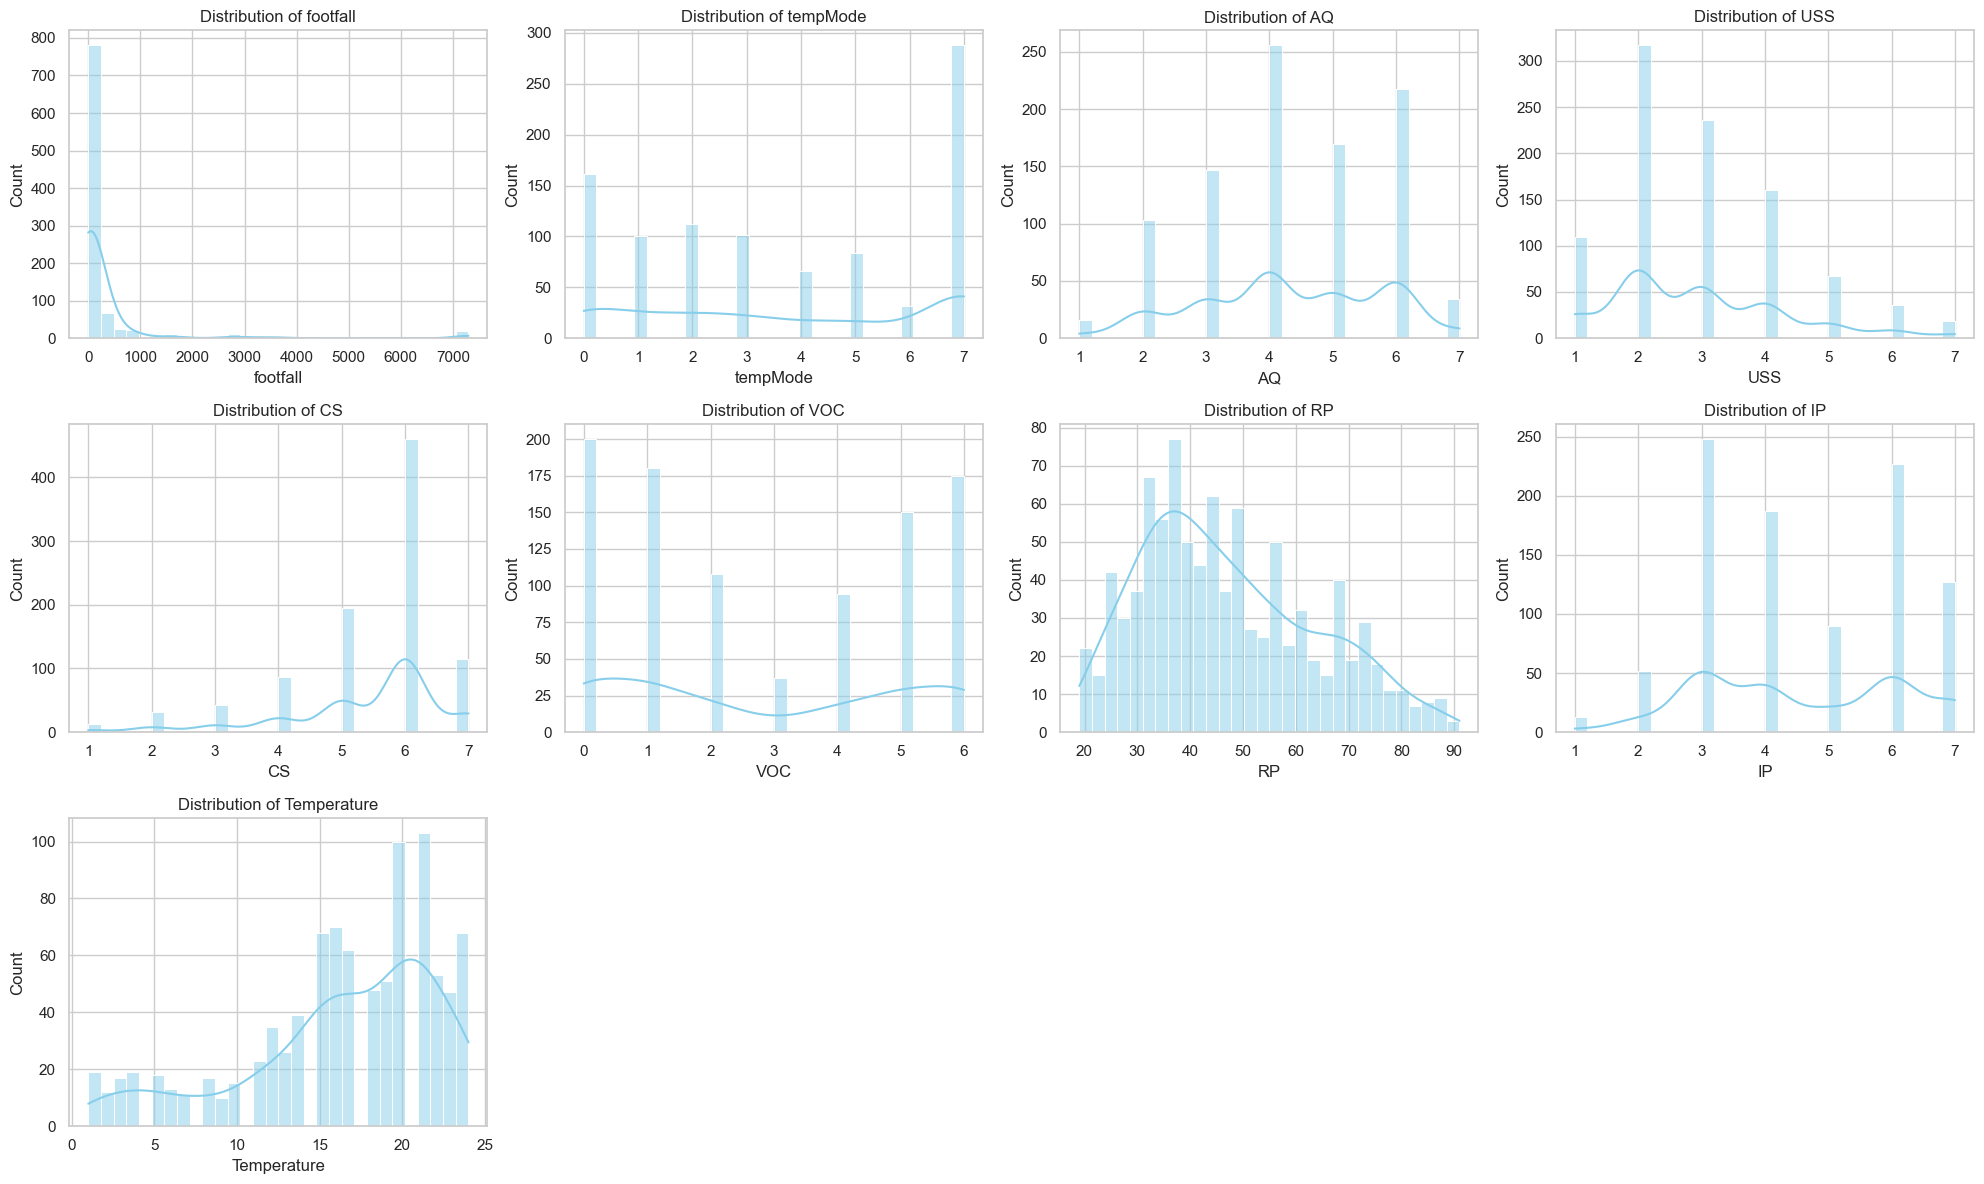

In [5]:
#plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

#loop over all features except the target
features = df.columns.drop("fail")

for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

Correaltion analysis:

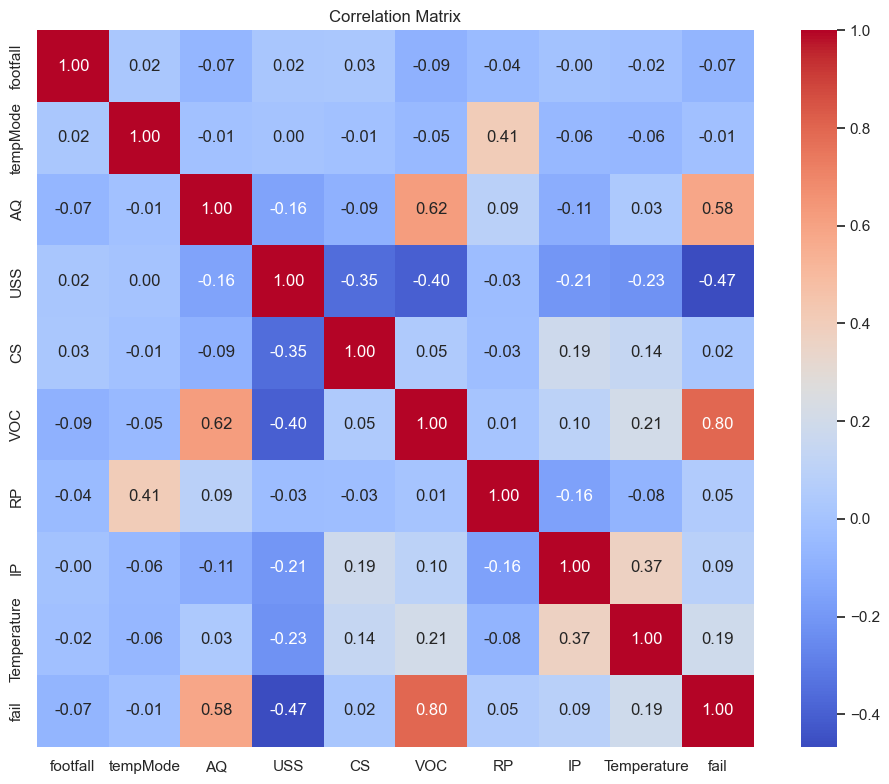

In [6]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

This heatmap helps detect features that are correlated with the target or with each other, which can guide feature engineering and model selection.